In [1]:
from __future__ import division, print_function
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
ubertrips = pd.read_pickle("../data/uber_trips_2015_datetime_nta.pickle")
geo = pd.read_csv("../data/geographic.csv")
demo = pd.read_csv("../data/demographics.csv")

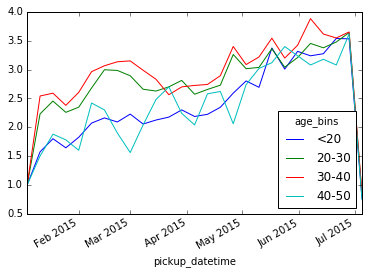

In [33]:
uber_trips_small = ubertrips.dropna()
uber_demo = uber_trips_small.groupby('nta_code').apply(lambda x: x.resample(rule='w').count())
uber_demo = uber_demo[['pickup_location_id']]
uber_demo = uber_demo.reset_index().rename(columns={'pickup_location_id': 'count'})
uber_demo = uber_demo.merge(demo, on='nta_code')
uber_demo = uber_demo.groupby(['pickup_datetime', 'median_age'])['count'].sum().unstack()
uber_age_group_week = uber_demo.T.reset_index()
uber_age_group_week['age_bins'] = np.digitize(uber_age_group_week['median_age'], bins=[20, 30, 40, 50])
uber_age_group_week = uber_age_group_week.drop('median_age', axis=1)
uber_age_group_week = uber_age_group_week.groupby('age_bins').sum().T
uber_age_group_week = uber_age_group_week.rename(columns={1: '<20', 2: '20-30', 3:'30-40', 4:'40-50', 5:'50+'})
uber_age_group_norm = uber_age_group_week/uber_age_group_week.iloc[0,:]
uber_age_group_norm.plot()

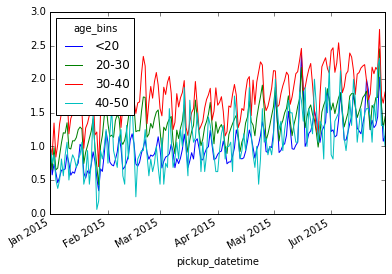

In [34]:
uber_demo_day = uber_trips_small.groupby('nta_code').apply(lambda x: x.resample(rule='d').count())
uber_demo_day = uber_demo_day[['pickup_location_id']]
uber_demo_day = uber_demo_day.reset_index().rename(columns={'pickup_location_id': 'count'})
uber_demo_day = uber_demo_day.merge(demo, on='nta_code')
uber_demo_day = uber_demo_day.groupby(['pickup_datetime', 'median_age'])['count'].sum().unstack()
uber_age_group_day = uber_demo_day.T.reset_index()
uber_age_group_day['age_bins'] = np.digitize(uber_age_group_day['median_age'], bins=[20, 30, 40, 50])
uber_age_group_day = uber_age_group_day.drop('median_age', axis=1)
uber_age_group_day = uber_age_group_day.groupby('age_bins').sum().T
uber_age_group_day = uber_age_group_day.rename(columns={1: '<20', 2: '20-30', 3:'30-40', 4:'40-50', 5:'50+'})
uber_age_group_norm = uber_age_group_day/uber_age_group_day.iloc[0,:]
uber_age_group_norm.plot()